In [ ]:
SIMULAÇÃO DE MONTECARLO PARA O PAYBACK DO PROJETO ESF

Média do Payback: 6.00 anos
% de projetos com payback < 10 anos: 100.00%
% de projetos que nunca se pagam: 0.00%


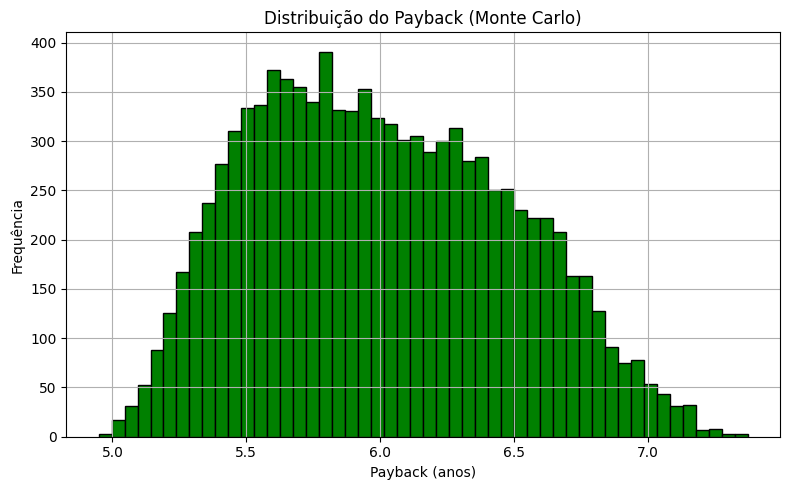

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#PAYBACK PARA O ESF

# --- Parâmetros Gerais ---
anos = 15
n_simulacoes = 10000

# Intervalos de incerteza
selic_range = (12.0484, 12.2516)                # Anual, em %
ipca_mensal_range = (0.4127, 0.4873)            # Mensal, em %

# Parâmetros específicos do projeto
preco_range = (135.58, 168.82)                  # R$/MWh
eficiencia_range = (0.24, 0.26)                 # Proporção (ex: 25%)
custo_var_range = (5, 15)                       # R$/MWh

capacidade_mwh = 2500                           # MWh
custo_fixo = 5000                               # R$/ano
investimento_inicial = 500000                   # R$

# --- Função de Cálculo do Payback ---
def calcular_payback(fluxos):
    acumulado = 0
    for t in range(1, len(fluxos)):
        acumulado += fluxos[t]
        if acumulado >= -fluxos[0]:
            restante = -fluxos[0] - sum(fluxos[1:t])
            return t - 1 + (restante / fluxos[t])  # Interpolação
    return np.nan  # Caso o investimento não se pague

# --- Simulação Monte Carlo ---
paybacks = []

for _ in range(n_simulacoes):
    preco = np.random.uniform(*preco_range)
    eficiencia = np.random.uniform(*eficiencia_range)
    custo_var = np.random.uniform(*custo_var_range)

    receita = preco * capacidade_mwh * eficiencia
    custo_total = custo_var * capacidade_mwh * eficiencia + custo_fixo
    fluxo = receita - custo_total

    fluxos = [-investimento_inicial] + [fluxo] * anos
    pb = calcular_payback(fluxos)
    paybacks.append(pb)

paybacks = np.array(paybacks)

# --- Resultados ---
print(f"Média do Payback: {np.nanmean(paybacks):.2f} anos")
print(f"% de projetos com payback < 10 anos: {(np.sum(paybacks < 10) / n_simulacoes) * 100:.2f}%")
print(f"% de projetos que nunca se pagam: {(np.sum(np.isnan(paybacks)) / n_simulacoes) * 100:.2f}%")

# --- Gráfico ---
plt.figure(figsize=(8, 5))
plt.hist(paybacks[~np.isnan(paybacks)], bins=50, color='green', edgecolor='black')
plt.title('Distribuição do Payback (Monte Carlo)')
plt.xlabel('Payback (anos)')
plt.ylabel('Frequência')
plt.grid(True)
plt.tight_layout()
plt.show()


Média do Payback (EBM): 11.60 anos
% de projetos com payback < 10 anos: 15.99%
% de projetos que nunca se pagam: 13.51%


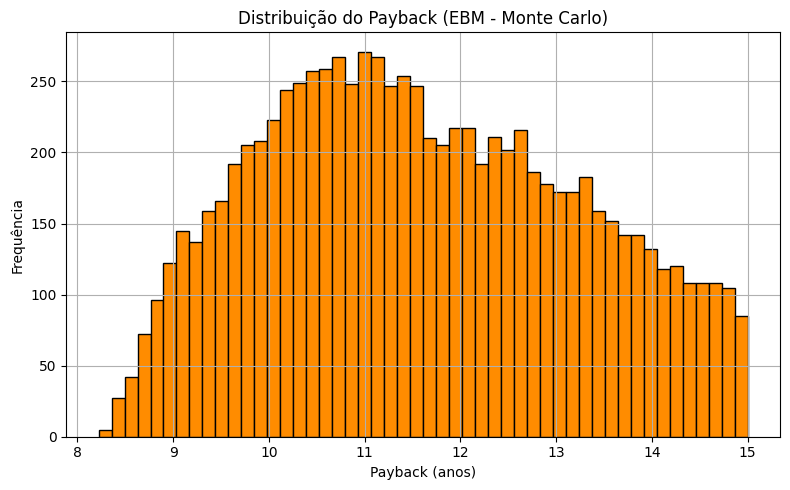

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parâmetros Gerais ---
anos = 15
n_simulacoes = 10000

# Intervalos de incerteza
selic_range = (12.0484, 12.2516)                # Anual, em %
ipca_mensal_range = (0.4127, 0.4873)            # Mensal, em %

# Parâmetros do projeto EBM
preco_range = (147.88, 183.70)                  # R$/MWh
eficiencia_range = (0.84, 0.86)                 # Proporção
custo_var_range = (30, 80)                      # R$/MWh

capacidade_mwh = 1000                           # MWh
custo_fixo = 10000                              # R$/ano
investimento_inicial = 1000000                  # R$

# --- Função de Cálculo do Payback ---
def calcular_payback(fluxos):
    acumulado = 0
    for t in range(1, len(fluxos)):
        acumulado += fluxos[t]
        if acumulado >= -fluxos[0]:
            restante = -fluxos[0] - sum(fluxos[1:t])
            return t - 1 + (restante / fluxos[t])  # Interpolação
    return np.nan  # Caso o investimento não se pague

# --- Simulação Monte Carlo ---
paybacks = []

for _ in range(n_simulacoes):
    preco = np.random.uniform(*preco_range)
    eficiencia = np.random.uniform(*eficiencia_range)
    custo_var = np.random.uniform(*custo_var_range)

    receita = preco * capacidade_mwh * eficiencia
    custo_total = custo_var * capacidade_mwh * eficiencia + custo_fixo
    fluxo = receita - custo_total

    fluxos = [-investimento_inicial] + [fluxo] * anos
    pb = calcular_payback(fluxos)
    paybacks.append(pb)

paybacks = np.array(paybacks)

# --- Resultados ---
print(f"Média do Payback (EBM): {np.nanmean(paybacks):.2f} anos")
print(f"% de projetos com payback < 10 anos: {(np.sum(paybacks < 10) / n_simulacoes) * 100:.2f}%")
print(f"% de projetos que nunca se pagam: {(np.sum(np.isnan(paybacks)) / n_simulacoes) * 100:.2f}%")

# --- Gráfico ---
plt.figure(figsize=(8, 5))
plt.hist(paybacks[~np.isnan(paybacks)], bins=50, color='darkorange', edgecolor='black')
plt.title('Distribuição do Payback (EBM - Monte Carlo)')
plt.xlabel('Payback (anos)')
plt.ylabel('Frequência')
plt.grid(True)
plt.tight_layout()
plt.show()
